# Funciones de distribucion de Probabilidad

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from scipy.stats import binom
import random

###  Find the cumulative distribution function for the Gaussian Distributin, and reproduce the plots. Choose a random number between 0 and 1, and use the CDF to assign the corresponding value of $H_{0}$. Generate as many as you want, and make the histogram of $H_{0}$ to verify you did right. Use a $\mu=70$ and $\sigma=2$.

## $p(x|\mu,\sigma)=\frac{1}{\sigma\sqrt{2\pi}}\exp{\left(-\frac{-(x-\mu)^{2}}{2\sigma^{2}}\right)}$

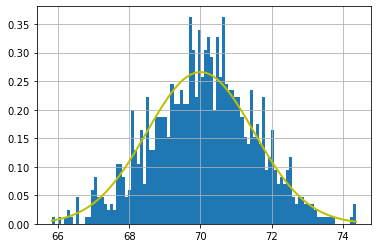

In [12]:
mu, sigma = 70, 1.5 
x = np.random.normal(mu, sigma, 1000) #distribucion aleatoria normal 
count, bins, ignored = plt.hist(x, 100, density=True)
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),linewidth=2,color='y')
plt.grid()
plt.show()

## CDF para la distribución normal 
# $\frac{1}{2}\left[ 1+ erf\left(\frac{x-\mu}{\sigma \sqrt{2}}\right) \right]$

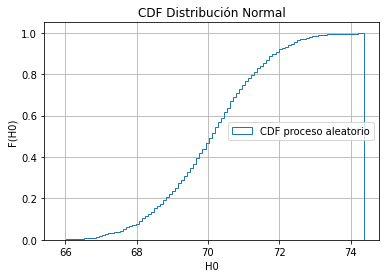

In [13]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(x, bins, density=True, histtype='step',cumulative=True, label='CDF proceso aleatorio')

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

#ax.plot(bins, y, 'k--', linewidth=1.5, label='CDF teorico')

ax.grid()
ax.legend(loc='right')
ax.set_title('CDF Distribución Normal')
ax.set_xlabel('H0')
ax.set_ylabel('F(H0)')
plt.show()



plt.show()

# Teoricamente

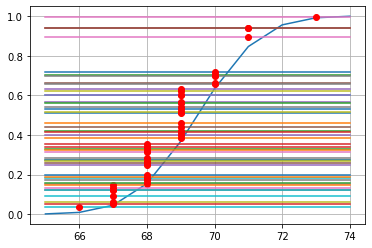

In [14]:
H0=np.zeros(50, dtype=float)
x = np.arange(65, 75)
#definimos la CDF
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (x - mu))**2)).cumsum()
y /= y[-1]

plt.plot(x, y, '-')
plt.grid()
for j in range(len(H0)):
    r=random.uniform(0, 1)
    g = np.array([r for i in range(len(x))])   
    plt.plot(x, g, '-')
    #encontramos el valor de H0 donde cruza el número aleatorio
    idx = np.argwhere(np.diff(np.sign(g - y))).flatten()
    plt.plot(x[idx], g[idx], 'ro')
    H0[j]=idx[0]
   
    


## Realizamos el histograma para los conteos de H0

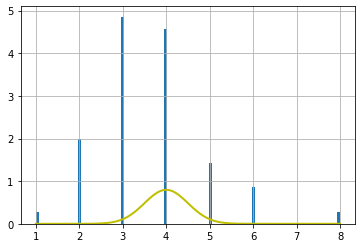

In [15]:
mu, sigma = 4, 0.5 
count, bins, ignored = plt.hist(H0, 100, density=True)
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),linewidth=2,color='y')
plt.grid()
plt.show()

## Distribución de Poisson 
## $P_{x}(k)=\lambda^{k}e^{-\lambda}/(k!)$
## con $k=0,1,2,...$
### Grafiquemos para $\lambda=2,3,4$

k:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
p(k): [0.00000000e+00 1.35335283e-01 2.70670566e-01 2.70670566e-01
 1.80447044e-01 9.02235222e-02 3.60894089e-02 1.20298030e-02
 3.43708656e-03 8.59271640e-04 1.90949253e-04 3.81898506e-05
 6.94360921e-06 1.15726820e-06 1.78041262e-07 2.54344660e-08
 3.39126213e-09 4.23907766e-10 4.98715019e-11 5.54127799e-12
 5.83292420e-13 5.83292420e-14]


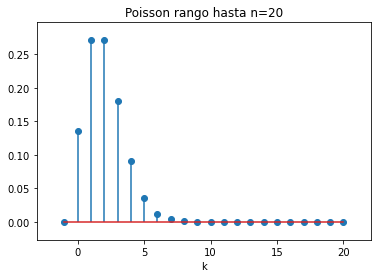

k:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
p(k): [0.00000000e+00 4.97870684e-02 1.49361205e-01 2.24041808e-01
 2.24041808e-01 1.68031356e-01 1.00818813e-01 5.04094067e-02
 2.16040315e-02 8.10151179e-03 2.70050393e-03 8.10151179e-04
 2.20950322e-04 5.52375804e-05 1.27471339e-05 2.73152870e-06
 5.46305740e-07 1.02432326e-07 1.80762929e-08 3.01271548e-09
 4.75691918e-10 7.13537877e-11]


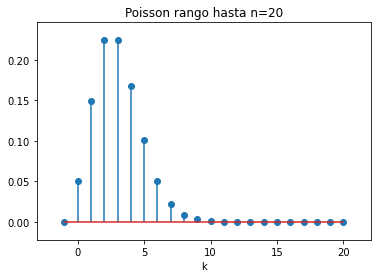

k:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
p(k): [0.00000000e+00 1.83156389e-02 7.32625556e-02 1.46525111e-01
 1.95366815e-01 1.95366815e-01 1.56293452e-01 1.04195635e-01
 5.95403626e-02 2.97701813e-02 1.32311917e-02 5.29247668e-03
 1.92453697e-03 6.41512324e-04 1.97388408e-04 5.63966879e-05
 1.50391168e-05 3.75977919e-06 8.84653927e-07 1.96589762e-07
 4.13873182e-08 8.27746365e-09]


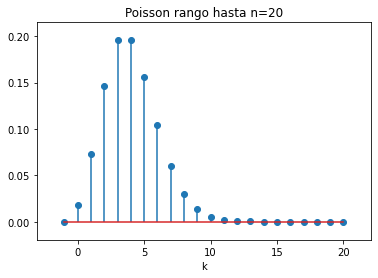

In [19]:
# Distribución Poisson con valor lambda
# INGRESO
n = 20
lambd = 2
loc = 0
lambd2 = 3
lambd3 = 4

# PROCEDIMIENTO
k = np.arange(loc-1, n+1)
px = poisson.pmf(k,lambd)
px2 = poisson.pmf(k,lambd2)
px3 = poisson.pmf(k,lambd3)

# SALIDA
print('k: ', k)
print('p(k):', px)
plt.title('Poisson rango hasta n='+str(n))
plt.stem(k,px)
plt.xlabel('k')
plt.margins(0.1)
plt.show()

# SALIDA
print('k: ', k)
print('p(k):', px2)
plt.title('Poisson rango hasta n='+str(n))
plt.stem(k,px2)
plt.xlabel('k')
plt.margins(0.1)
plt.show()

# SALIDA
print('k: ', k)
print('p(k):', px3)
plt.title('Poisson rango hasta n='+str(n))
plt.stem(k,px3)
plt.xlabel('k')
plt.margins(0.1)
plt.show()

## CDF Poisson

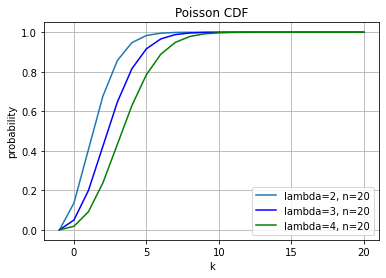

In [20]:
# cdf(k, mu, loc=0)  Cumulative distribution function.

CDF = poisson.cdf(k, lambd) 
CDF2 = poisson.cdf(k, lambd2)
CDF3 = poisson.cdf(k, lambd3)
plt.plot(k, CDF, '', label='lambda=2, n=20')
plt.plot(k,CDF2, '', color='b', label='lambda=3, n=20')
plt.plot(k,CDF3, '', color='g', label='lambda=4, n=20')
plt.legend()
plt.title('Poisson CDF')
plt.ylabel('probability')
plt.grid()
plt.xlabel('k')
plt.show()

## Para la función binomial tenemos que 

## $f(k)=\binom{n}{k}p^{k}(1-p)^{n-k}$
## con $k=0,1,2,3,...$

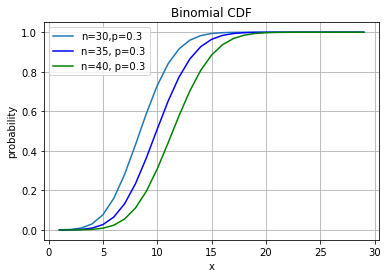

In [21]:
# Usamos binom.pmf(k, n, p, loc)

n, p = 30, 0.3
n2, p2 = 35, 0.3
n3, p3 = 40, 0.3

binomial = binom(n, p) 
binomial2 = binom(n2,p2)
binomial3 = binom(n3, p3)
x = np.arange(1,30,1)
CDF = binomial.cdf(x) 
CDF2 = binomial2.cdf(x)
CDF3 = binomial3.cdf(x)
plt.plot(x, CDF, '', label='n=30,p=0.3')
plt.plot(x,CDF2, '', color='b', label='n=35, p=0.3')
plt.plot(x,CDF3, '', color='g', label='n=40, p=0.3')
plt.legend()
plt.title('Binomial CDF')
plt.ylabel('probability')
plt.grid()
plt.xlabel('x')
plt.show()

## CDF Binomial 

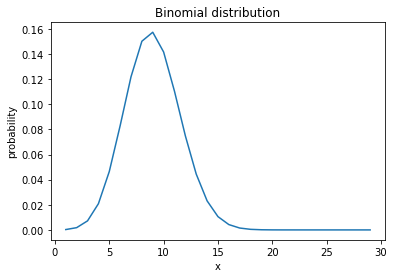

In [22]:
fmp = binomial.pmf(x)
plt.plot(x, fmp, '')
plt.title('Binomial distribution')
plt.ylabel('probability')
plt.xlabel('x')
plt.show()